# Process cleaned data 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Sanjay\Datasets\Data processing\netflix.csv")

In [3]:
df.shape


(7787, 12)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

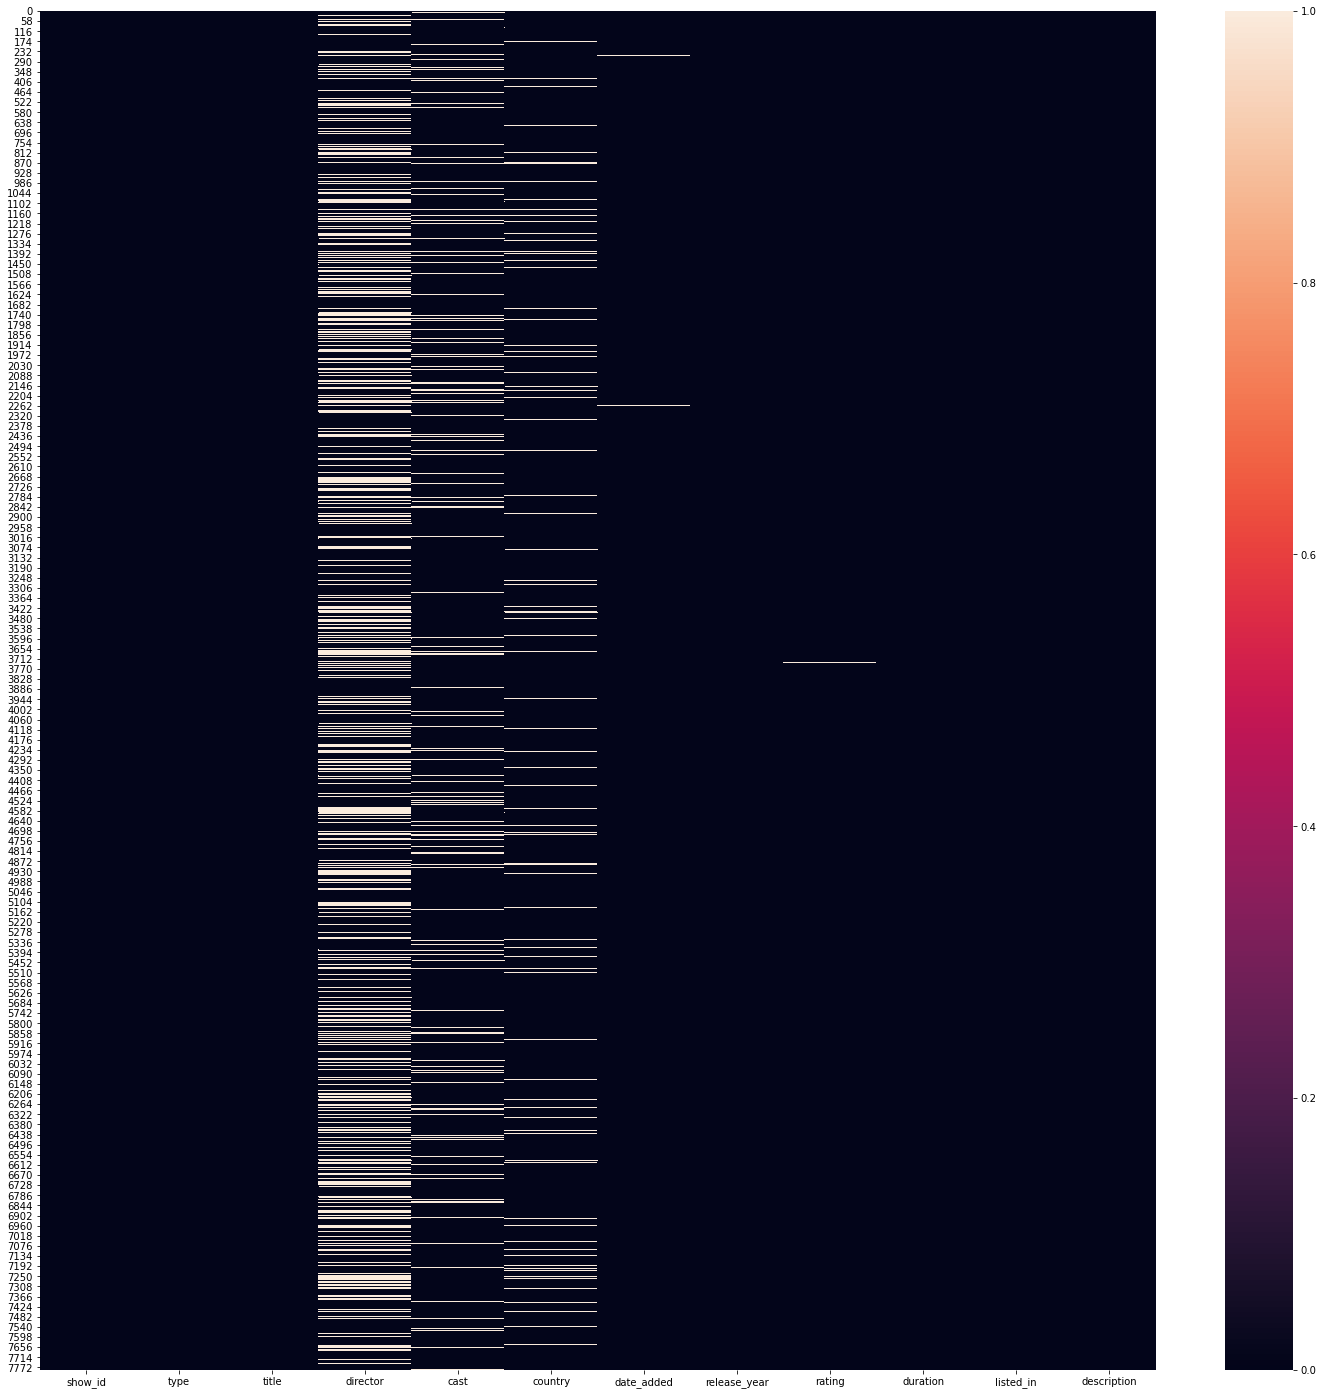

In [9]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [11]:
null_var=df.isnull().sum()/df.shape[0]*100

In [12]:
null_var

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [13]:
drop_col=null_var[null_var>20].keys()
drop_col

Index(['director'], dtype='object')

In [14]:
df2=df.drop(columns=drop_col)

In [15]:
df2.shape

(7787, 11)

<AxesSubplot:>

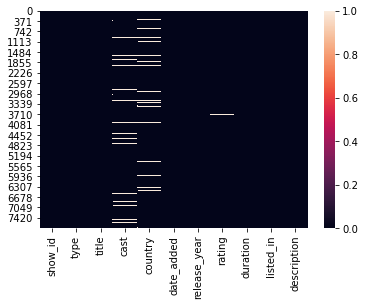

In [16]:
sns.heatmap(df2.isnull())

In [17]:
df3=df2.dropna()

In [18]:
df3.shape

(6643, 11)

<AxesSubplot:>

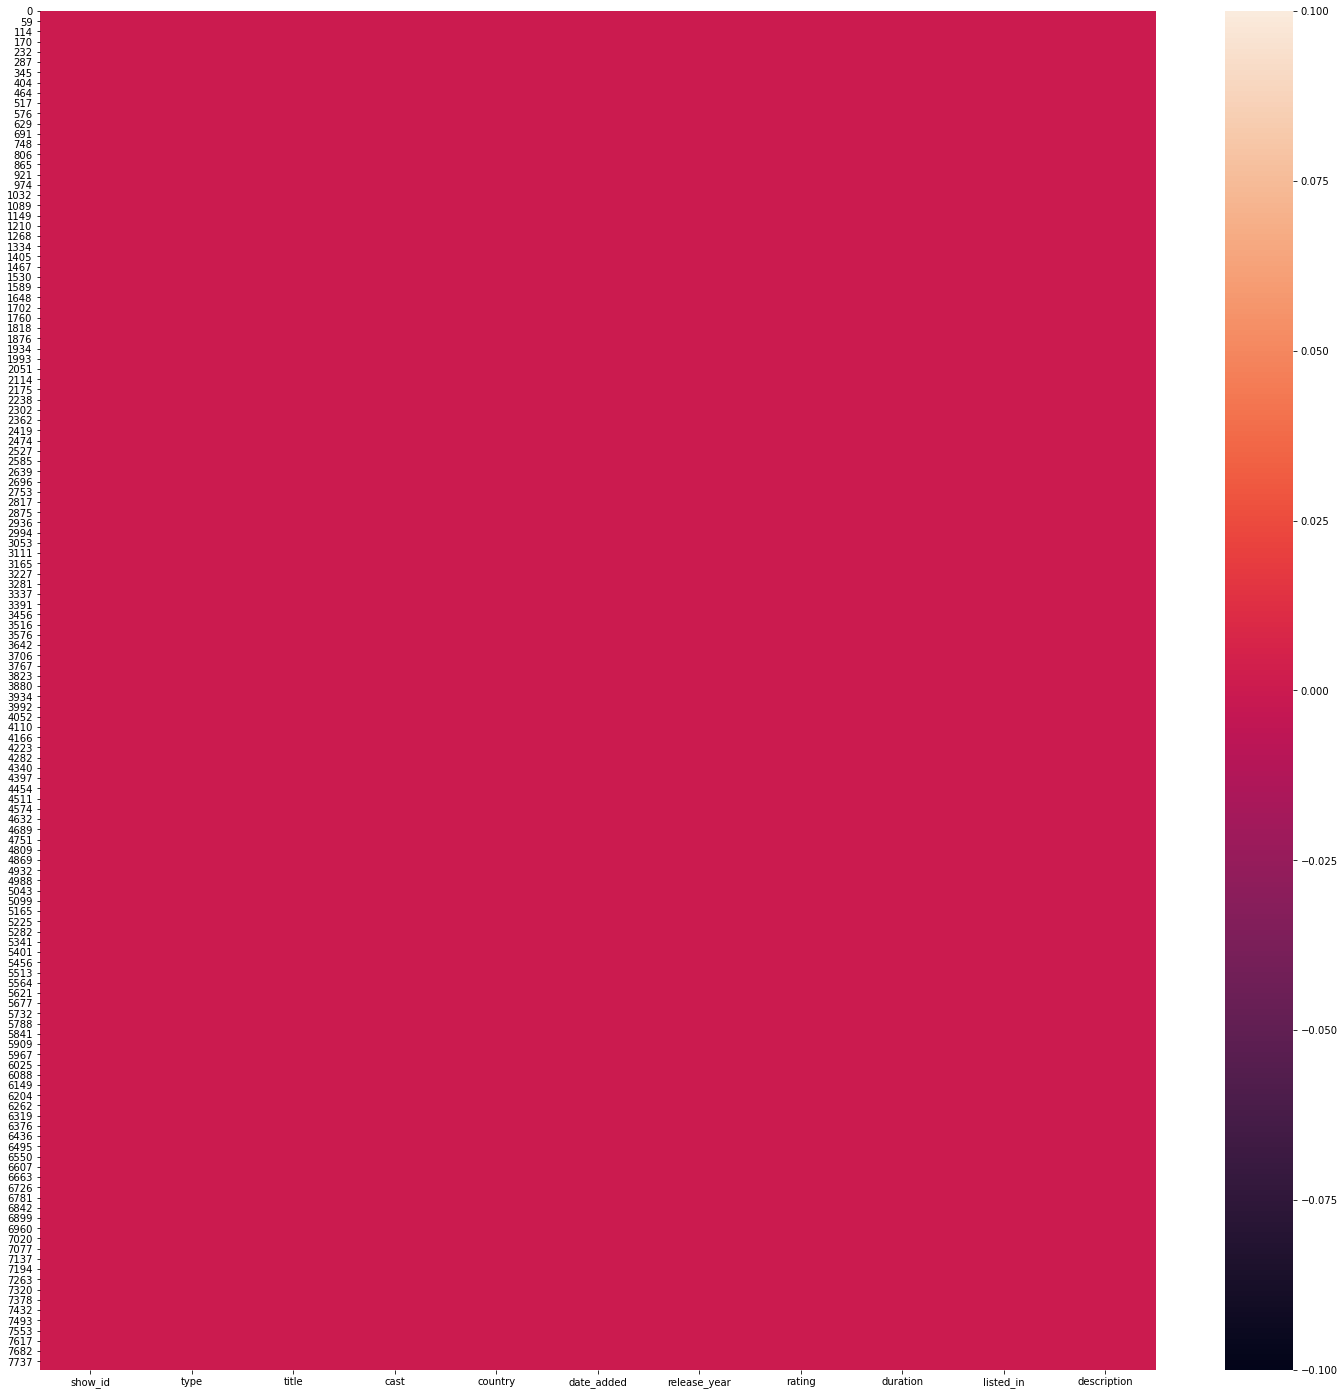

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(df3.isnull())

In [20]:
df3.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
df3.select_dtypes(include=['int64','float64']).columns

Index(['release_year'], dtype='object')

C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='release_year', ylabel='Density'>

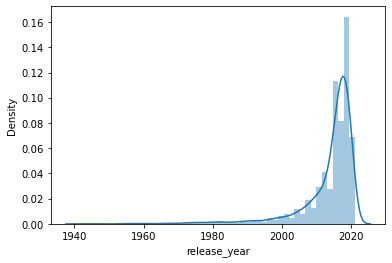

In [23]:
sns.distplot(df3['release_year'])

C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='release_year', ylabel='Density'>

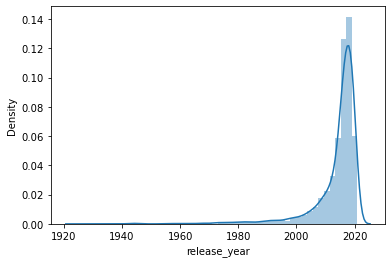

In [24]:
sns.distplot(df['release_year'])

C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='release_year', ylabel='Density'>

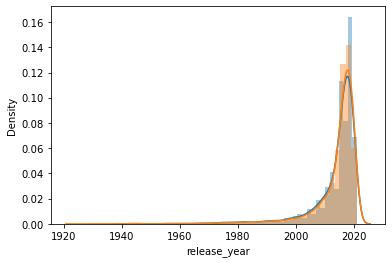

In [25]:
sns.distplot(df3['release_year'])
sns.distplot(df['release_year'])

In [50]:
obj=df3.select_dtypes(include=['object']).columns
obj

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')

In [30]:
df['country'].value_counts()/df3.shape[0]*100

United States                                                         38.461538
India                                                                 13.894325
United Kingdom                                                         5.976216
Japan                                                                  3.402077
South Korea                                                            2.754779
                                                                        ...    
United States, Canada, Indonesia, United Kingdom, China, Singapore     0.015053
United Kingdom, United States, Dominican Republic                      0.015053
Norway, Iceland, United States                                         0.015053
United Kingdom, China, United States                                   0.015053
France, Norway, Lebanon, Belgium                                       0.015053
Name: country, Length: 681, dtype: float64

In [37]:
pd.concat([df['country'].value_counts()/df.shape[0]*100, 
           df3['country'].value_counts()/df3.shape[0]*100], axis=1, 
            keys=['org','cleaned'])

,org,cleaned
United States,32.811095,33.749812
India,11.853088,13.457775
United Kingdom,5.098241,4.982689
Japan,2.902273,3.311757
South Korea,2.350071,2.709619
...,...,...
"United States, Canada, Indonesia, United Kingdom, China, Singapore",0.012842,0.015053
"United Kingdom, United States, Dominican Republic",0.012842,0.015053
"Norway, Iceland, United States",0.012842,0.015053
"United Kingdom, China, United States",0.012842,0.015053


In [64]:
def var_dist(val):
    return (pd.concat([df['val'].value_counts()/df.shape[0]*100, 
           df3['val'].value_counts()/df3.shape[0]*100], axis=1, 
            keys=[val+'org',val+'cleaned']))

In [43]:
df3.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [55]:
ls=['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']

In [65]:
for i,j in enumerate(ls):
    print(j)
    var_dist(j)

show_id


KeyError: 'val'